In [1]:
from functions import Make_test, XGBoost_Model, XGB_test
from clean_dataframe import clean_dataframe, X_Y_split
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

In [2]:
# Load datasets
mu_100 = pd.read_csv("./test_files/test_check_3.csv")
delta_10_5 = pd.read_csv("./test_files/test_check_6.csv")
delta_5 = pd.read_csv("./test_files/test_check_8.csv")
delta_2 = pd.read_csv("./test_files/test_check_10.csv")
mu_001 = pd.read_csv("./test_files/test_check_11.csv")

In [8]:
delta_1  = pd.read_csv("./test_files/newscene_120.csv")
delta_1_clean = clean_dataframe(delta_1)

In [4]:
mu_100 = clean_dataframe(mu_100)
delta_10_5 = clean_dataframe(delta_10_5)
delta_5 = clean_dataframe(delta_5)
delta_2 = clean_dataframe(delta_2)
mu_001 = clean_dataframe(mu_001)

# Test with Trained Models


In [5]:
model_1 = xgb.Booster({'nthread': 4})  # init model
model_1.load_model('./trained_models/new_xgb_model_1.model')  # load data

model_2 = xgb.Booster({'nthread': 4})  # init model
model_2.load_model('./trained_models/new_xgb_model_2.model')  # load data

[15:24:49] WARNING: /Users/Lawrence/Documents/MACHINE_LEARNING/xgboost/src/objective/regression_obj.cu:144: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:49] WARNING: /Users/Lawrence/Documents/MACHINE_LEARNING/xgboost/src/objective/regression_obj.cu:144: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
delta_1_clean['delta'] = delta_1.delta
delta_1_clean.head()

,VELOC:0,AVVEL:0,Points:0,Points:1,Points:2,u_plus,Local_Re,Local_Re_Avg,Local_Re_log,Log_delta,y_plus,delta
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.001000,0.000000,-6.907755,-6.907755,0.000000,0.001000
1,0.040839,0.140765,0.0,0.005556,0.0,0.799828,0.755861,2.601906,-0.279898,-5.027333,0.799828,0.006556
2,0.086451,0.276276,0.0,0.011781,0.0,1.693160,3.116026,9.954793,1.136559,-4.359828,1.695820,0.012781
3,0.139361,0.403911,0.0,0.018748,0.0,2.729391,7.760038,22.488119,2.048987,-3.924689,2.698822,0.019748
4,0.200480,0.517531,0.0,0.026542,0.0,3.926415,15.567945,40.185478,2.745214,-3.592046,3.820720,0.027542


# Same flow different time snap

In [11]:
test1_delta_1 = XGB_test(model_1, delta_1)
test2_delta_1 = XGB_test(model_2, delta_1)

Test 1 rmse score: 1.167


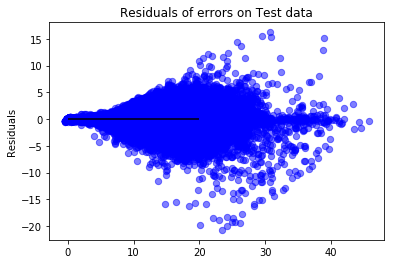

In [8]:
print(f"Test 1 rmse score: {test1_delta_1.score('rmse', plot_residuals=1):.3f}")     

Test 2 rmse score: 0.398


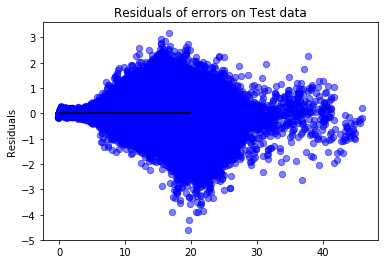

In [9]:
print(f"Test 2 rmse score: {test2_delta_1.score('rmse', plot_residuals=1):.3f}") 

In [10]:
print(test1_delta_1.score("r2"))
print(test2_delta_1.score("r2"))

0.9647059901879111
0.9960353662338709


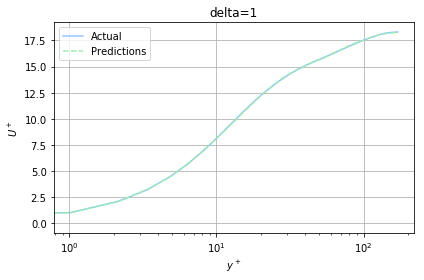

In [11]:
test1_delta_1.make_plot(title="delta=1")

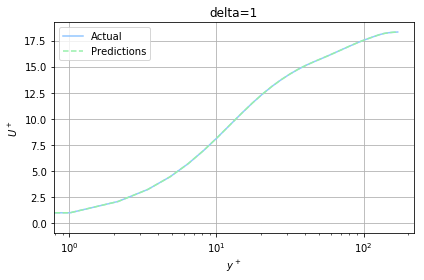

In [12]:
test2_delta_1.make_plot(title="delta=1")

In [16]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

df = test1_delta_1.compare_values()
#df['delta'] = np.round(np.abs(df.ACTUALS - df.PREDICTIONS)).astype(int)
df['delta'] = np.abs(df.ACTUALS - df.PREDICTIONS)
"""
fig, ax = plt.subplots()
df.plot.scatter(ax=ax , x="ACTUALS", y="PREDICTIONS", alpha=0.25, c='delta',
                                            colormap='magma')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.set_xlabel(r'$U^+$ (actual)')
ax.set_ylabel(r'$U^+$ (predicted)')
ax.set_title('Predictions vs Actual Values');
""";

def plot_predictions(dataframe, colormap=False):
    msg = "Column names should be PREDICTIONS and ACTUALS respectively!"
    assert "PREDICTIONS" and "ACTUALS" in dataframe.columns, msg
    fig, ax = plt.subplots()
    if colormap:
        dataframe['delta'] = np.abs(dataframe.ACTUALS - dataframe.PREDICTIONS)
        dataframe.plot.scatter(ax=ax , x="ACTUALS", y="PREDICTIONS", alpha=0.5, c='delta',
                               colormap='jet')
    else:
        dataframe.plot.scatter(ax=ax , x="ACTUALS", y="PREDICTIONS", alpha=0.25)
    
    line = mlines.Line2D([1, 1], [1, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    ax.set_xlabel(r'$U^+$ (actual)')
    ax.set_ylabel(r'$U^+$ (predicted)')
    ax.set_title('Predictions vs Actual Values');

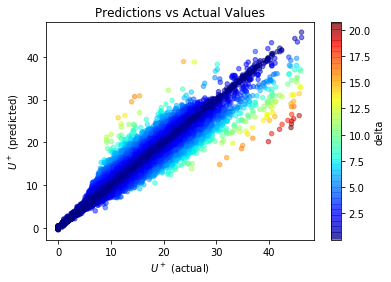

In [17]:
plot_predictions(df, True)

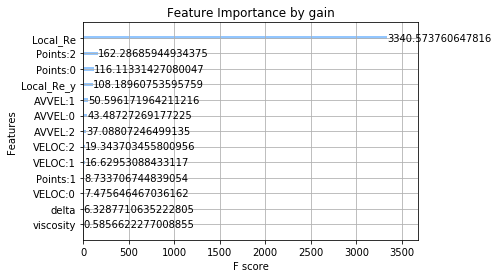

In [7]:
test1_delta_1.plot_importance()

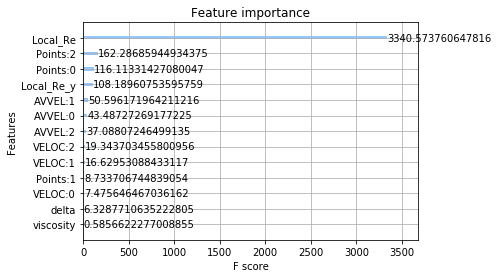

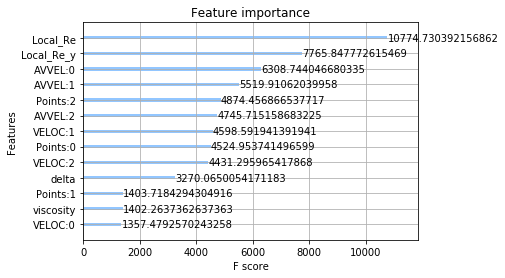

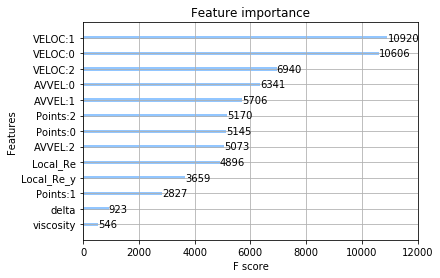

In [20]:
from xgboost import plot_importance

plot_importance(model_1, importance_type="gain")
plot_importance(model_1, importance_type="cover")
plot_importance(model_1)

In [13]:
test2_delta_1.compare_values()

,ACTUALS,PREDICTIONS
0,0.000000,0.019995
1,0.799828,0.809260
2,1.693160,1.714001
3,2.729391,2.755540
4,3.926415,3.925908
5,5.222560,5.230555
6,6.505827,6.433724
7,7.675036,7.674961
8,8.691538,8.666038
9,9.584407,9.390834


# mu = 100

In [8]:
test1_mu_100 = XGB_test(model_1, mu_100)
test2_mu_100 = XGB_test(model_2, mu_100)

Test 1 rmse score: 1.549


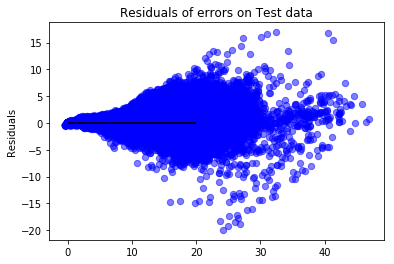

In [9]:
print(f"Test 1 rmse score: {test1_mu_100.score('rmse', plot_residuals=1):.3f}")     

Test 2 rmse score: 4.428


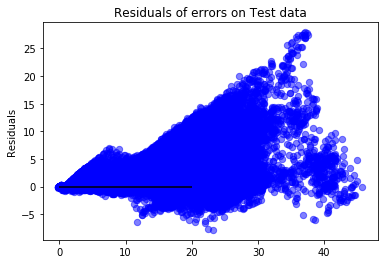

In [10]:
print(f"Test 2 rmse score: {test2_mu_100.score('rmse', plot_residuals=1):.3f}") 

In [11]:
print(test1_mu_100.score("r2"))
print(test2_mu_100.score("r2"))

0.9425555104804549
0.6397337347002099


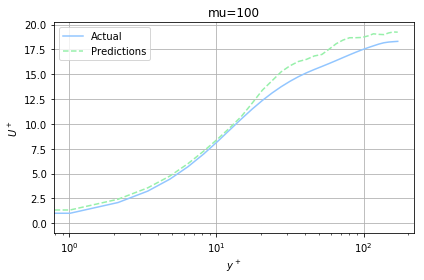

In [12]:
test1_mu_100.make_plot(title="mu=100")

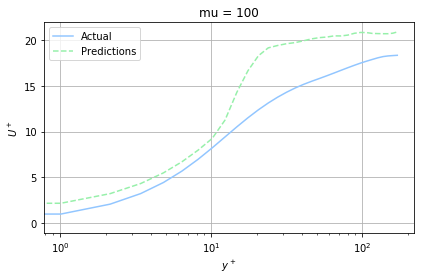

In [13]:
test2_mu_100.make_plot(title="mu = 100")

,ACTUALS,PREDICTIONS,delta
0,0.000000,0.016730,0.016730
1,0.799828,0.993076,0.193248
2,1.693160,1.891952,0.198791
3,2.729391,2.772130,0.042739
4,3.926415,4.007597,0.081182
5,5.222560,5.266410,0.043850
6,6.505827,6.664775,0.158949
7,7.675036,7.943408,0.268372
8,8.691538,8.093943,0.597596
9,9.584407,9.485247,0.099160


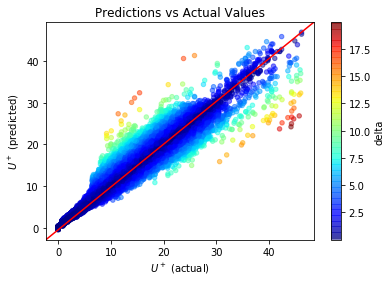

In [15]:
test1_mu_100.compare_values(plot=True)

# delta = 2

In [16]:
test1_delta_2 = XGB_test(model_1, delta_2)
test2_delta_2 = XGB_test(model_2, delta_2)

Test 1 rmse score: 2.925


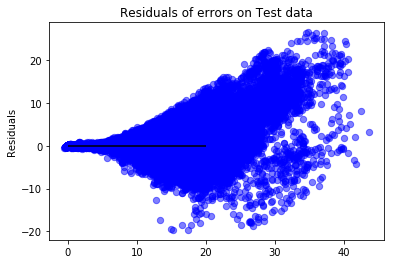

In [17]:
print(f"Test 1 rmse score: {test1_delta_2.score('rmse', plot_residuals=1):.3f}")     

Test 2 rmse score: 3.627


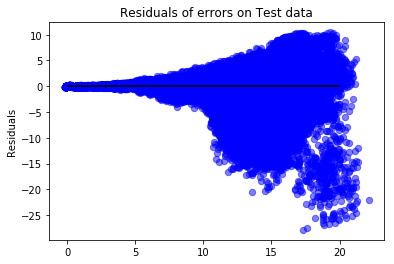

In [18]:
print(f"Test 2 rmse score: {test2_delta_2.score('rmse', plot_residuals=1):.3f}") 

In [19]:
print(f"Test 1 R_2 score: {test1_delta_2.score('r2'):.3f}")
print(f"Test 2 R_2 score: {test2_delta_2.score('r2'):.3f}")

Test 1 R_2 score: 0.803
Test 2 R_2 score: 0.367


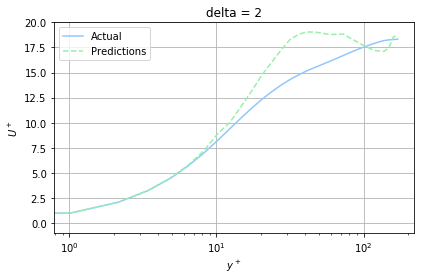

In [20]:
test1_delta_2.make_plot(title="delta = 2")

,ACTUALS,PREDICTIONS,delta
0,0.000000,0.016730,0.016730
1,0.799828,0.879353,0.079525
2,1.693160,1.725869,0.032709
3,2.729391,2.691297,0.038095
4,3.926415,3.642614,0.283801
5,5.222560,4.791318,0.431242
6,6.505827,6.842145,0.336319
7,7.675036,7.306589,0.368447
8,8.691538,8.609655,0.081883
9,9.584407,9.573840,0.010567


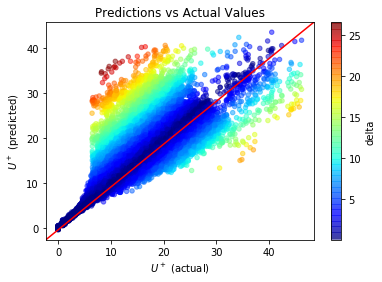

In [21]:
test1_delta_2.compare_values(plot=True)

# Test with Re= 1000

In [22]:
new_test_file = pd.read_csv("./raw_files/clean_scene_60.csv")

In [23]:
new_test_file = clean_dataframe(new_test_file)

In [24]:
new_test_file.head()

,VELOC:0,VELOC:1,VELOC:2,AVVEL:0,AVVEL:1,AVVEL:2,Points:0,Points:1,Points:2,delta,u_plus,viscosity,Local_Re,Local_Re_y,y_plus
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000355,0.000000,0.000000,0.000000
1,0.059457,0.000196,-0.004034,0.057204,0.000044,-0.003905,0.0,0.001287,0.0,0.001287,1.195406,0.000355,0.215804,0.215804,1.195406
2,0.120244,0.000855,-0.009068,0.116839,0.000190,-0.007199,0.0,0.002656,0.0,0.002656,2.417541,0.000355,0.900367,0.900367,2.466141
3,0.181232,0.001882,-0.014029,0.178048,0.000421,-0.009805,0.0,0.004111,0.0,0.004111,3.643706,0.000355,2.100331,2.100331,3.816950
4,0.242209,0.003065,-0.017869,0.240329,0.000720,-0.011722,0.0,0.005657,0.0,0.005657,4.869669,0.000355,3.863002,3.863002,5.252879


In [25]:
new_test_1 = XGB_test(model_1, new_test_file)
new_test_2 = XGB_test(model_2, new_test_file)

In [26]:
print(f"Test 1 rmse score: {new_test_1.score('rmse'):.3f}")
print(f"Test 2 rmse score: {new_test_2.score('rmse'):.3f}")

Test 1 rmse score: 6.246
Test 2 rmse score: 6.216


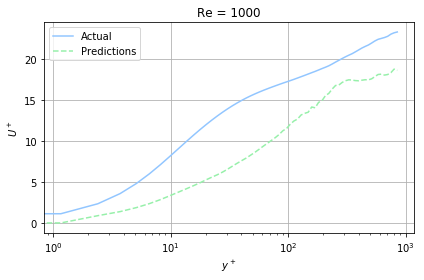

In [27]:
new_test_1.make_plot(title="Re = 1000")

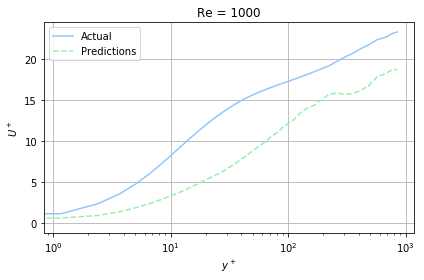

In [28]:
new_test_2.make_plot(title="Re = 1000")

-0.08251639255469168

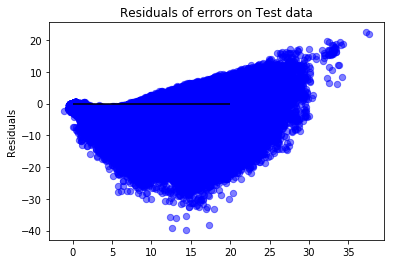

In [29]:
new_test_1.score("r2", plot_residuals=True)

,ACTUALS,PREDICTIONS,delta
0,0.000000,0.019995,0.019995
1,1.195406,0.664688,0.530718
2,2.417541,0.986221,1.431320
3,3.643706,1.487880,2.155825
4,4.869669,1.964776,2.904894
5,6.085607,2.460740,3.624867
6,7.327483,3.029420,4.298063
7,8.389279,3.470526,4.918753
8,9.270098,4.074946,5.195152
9,10.037231,4.264954,5.772278


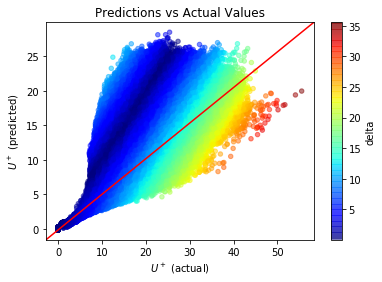

In [31]:
new_test_2.compare_values(plot=True)

-0.1491533893152437

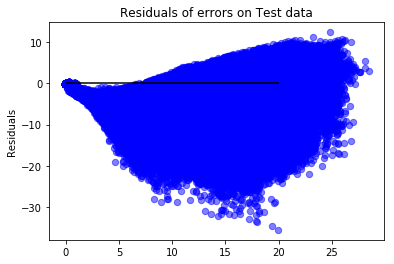

In [26]:
new_test_2.score("r2", plot_residuals=True)

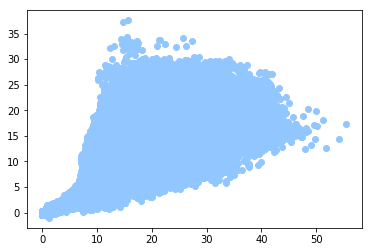

In [28]:
to_plot_1 = new_test_1.compare_values()
plt.scatter(to_plot_1.ACTUALS, to_plot_1.PREDICTIONS)

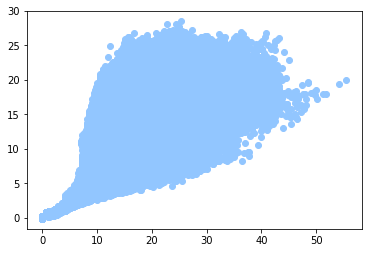

In [29]:
to_plot_2 = new_test_2.compare_values()
plt.scatter(to_plot_2.ACTUALS, to_plot_2.PREDICTIONS)

In [33]:
model_1.booster

'gbtree'